In [8]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from coursera_data_cleaner import clean_coursera_data

spark = SparkSession.builder \
    .master("local") \
    .appName("Coursera") \
    .getOrCreate()

dataFile = "Coursera.csv"
raw_data = spark.read.csv(dataFile, header=True)


In [10]:
cleaned_data = clean_coursera_data(spark, raw_data)
classified_rows = cleaned_data.filter(cleaned_data['Department'].isNotNull())
print(classified_rows.count())
classified_rows.select('Course Name').show(99, False)

40
+--------------------------------------------------------------------+
|Course Name                                                         |
+--------------------------------------------------------------------+
|Retrieve Data using Single-Table SQL Queries                        |
|Mastering SQL Joins                                                 |
|Create a Database with the Modeling Tool in MySQL Workbench         |
|Create Relational Database Tables Using SQLiteStudio                |
|Managing Big Data with MySQL                                        |
|Complex Retrieval Queries in MySQL Workbench                        |
|Performing Data Definition and Manipulation in SQL                  |
|Performing Data Aggregation using SQL Aggregate Functions           |
|Databases and SQL for Data Science                                  |
|Advanced SQL Retrieval Queries in SQLiteStudio                      |
|Create a Python Application using MySQL                             |
|Cr

In [11]:
summary_by_department = cleaned_data.groupBy('Department').count()
print('Count of Courses by Department')
summary_by_department.show(truncate=False)

+-----------+-----+
|Department |count|
+-----------+-----+
|null       |3491 |
|Programming|40   |
+-----------+-----+



In [12]:
summary_rows = summary_by_department.collect()

departments = list(map(lambda row: 'n/a' if row[0] is None else row[0], summary_rows))
course_count = list(map(lambda row: row[1], summary_rows))

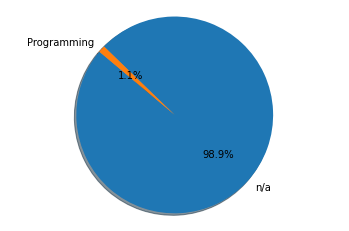

In [13]:
plt.pie(course_count, labels=departments, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()